# Exploration of Different Manifold Learning Algorithms

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from umap import UMAP
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor

## CIFAR-10 Dataset
It has 60k instances of small images that are divided into 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. We will load this dataset and put the images in X and labels in y.

In [3]:
# Load CIFAR-10 dataset
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


In [4]:
X_train = np.array(dataset.data)
y_train = np.array(dataset.targets)

Let's visualize some images with labels

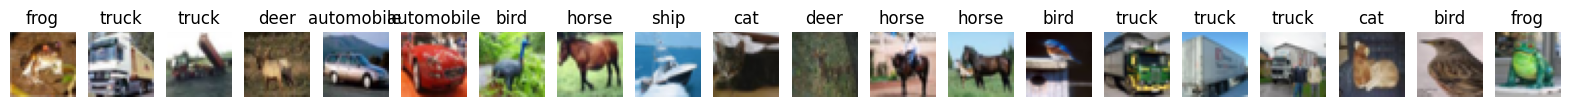

In [5]:
# Labels in the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting the images along with their labels

plt.figure(figsize=(20, 5))
for i in range(20):
  plt.subplot(1, 20, i + 1)
  plt.imshow(X_train[i])
  plt.title(labels[y_train[i]])
  plt.axis('off')
plt.show()


# Visualization

We will only fit and visualize a subset of the data (1000 points) for faster computations. and cleaner visualizations.

## PCA

PCA is a technique that indentifies the axes with maximum variance in the data. It works well to visualize the linear relationship in the data. It is computationally fast. Let's implement it and visualize. We will loop within in each class and project the data in 2D with the first and second components as the axes.

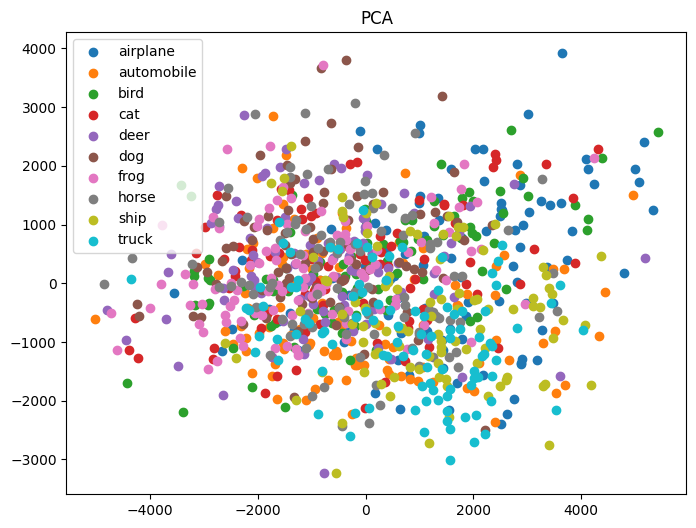

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train[:1000].reshape(1000, -1))

plt.figure(figsize=(8, 6))
for i in range(10):
    indices = np.where(y_train[:1000] == i)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=labels[i])
plt.title("PCA")
plt.legend()
plt.show()

## Observation

As we can see the classes are not well separated since PCA is only good at capturing the linear relationship and in our case, the color images contain complex non-linear relationships.

## Isomap Embedding

Isomap works well when we have high dimensional data with non linear relationships which are both true in our case. Again, we will implement and visualize it. The axes will be the first and second component. Since it is computationaly expensive, we will only plot the subset (1000 points) of the data.


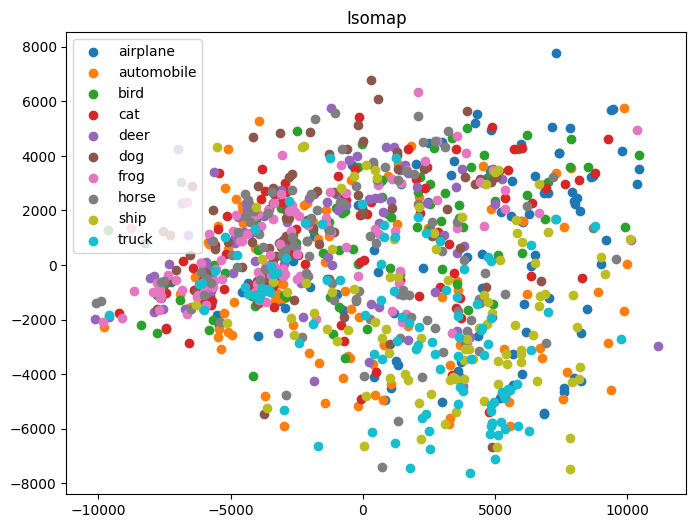

In [12]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_train[:1000].reshape(1000, -1))

plt.figure(figsize=(8, 6))
for i in range(10):
    indices = np.where(y_train[:1000] == i)
    plt.scatter(X_isomap[indices, 0], X_isomap[indices, 1], label=labels[i])
plt.title("Isomap")
plt.legend()
plt.show()

## Observation

Here, we see a better separation than PCA. We can also notice that animals lie mostly on the left side of the graph and man made structures on the right. Bird and airplane are close to each other with a high frequency as we go up the graph.  

## Locally Linear Embedding

It is a non-linear technique that tries to represent high dimensional data to lower dimensions by preserving the distances in the local neighborhood.

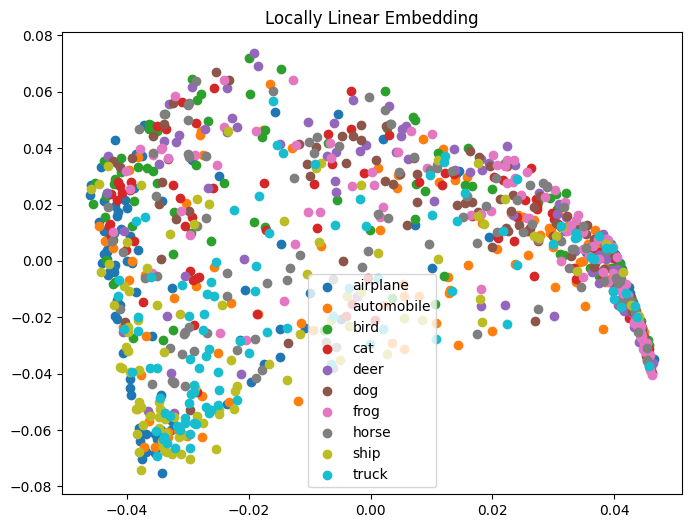

In [14]:
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_train[:1000].reshape(1000, -1))

plt.figure(figsize=(8, 6))
for i in range(10):
    indices = np.where(y_train[:1000] == i)
    plt.scatter(X_lle[indices, 0], X_lle[indices, 1], label=labels[i])
plt.title("Locally Linear Embedding")
plt.legend()
plt.show()

## Observation

We notice a separation between the airplane, ship, trucks on the left and animals on the right. We can notice that the animals are very close to each other thereby maintaining the local distances. Similarly, trucks and ships are very close to each other; and bird and airplanes as well.


## Multidimensional scaling

MDS is a dimnension reduction technique that keeps similar points close to each other and dissimilar points are far away from each other.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


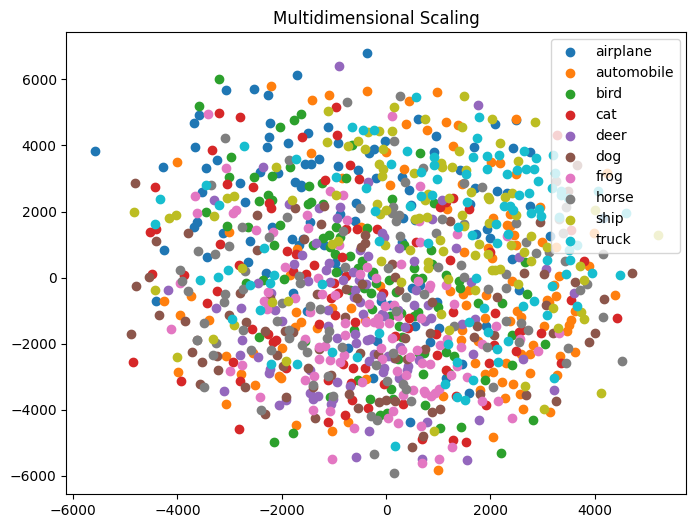

In [6]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_train[:1000].reshape(1000, -1))

plt.figure(figsize=(8, 6))
for i in range(10):
    indices = np.where(y_train[:1000] == i)
    plt.scatter(X_mds[indices, 0], X_mds[indices, 1], label=labels[i])
plt.title("Multidimensional Scaling")
plt.legend()
plt.show()

## Observation

There isn't a very clear separation but a little degree of separation can be observed where animals are densely located on the left while man made on the right.

## Spectral Embedding
A non linear dimension reduction technique that projects the data in lower dimension by using eigenvalues and eigenvectors of a similarity matrix.

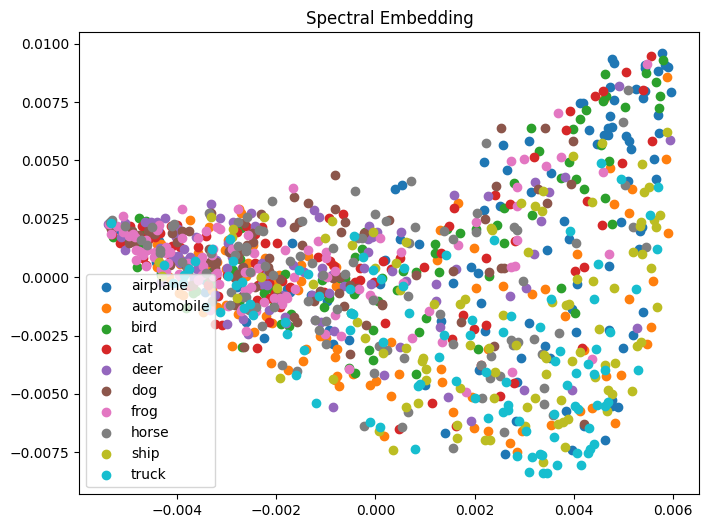

In [9]:
spectral = SpectralEmbedding(n_components=2)
X_spectral = spectral.fit_transform(X_train[:1000].reshape(1000, -1))

plt.figure(figsize=(8, 6))
for i in range(10):
    indices = np.where(y_train[:1000] == i)
    plt.scatter(X_spectral[indices, 0], X_spectral[indices, 1], label=labels[i])
plt.title("Spectral Embedding")
plt.legend()
plt.show()

## Observation

Most animals lie on the left of the graph quite close to each other while airplanes, trucks and automobiles are on the right and more dispersed as there can be more variety. Airplanes and birds tend to be close to each other.

## T-distributed Stochastic Neighbor Embedding

Non linear technique that constructs a probability distribution of the high dimensional points. It then minimizes the Kullback-Leibler divergence between this distribution and a distribution over the lower dimensional counterparts, thereby embedding the data points into a lower dimension.

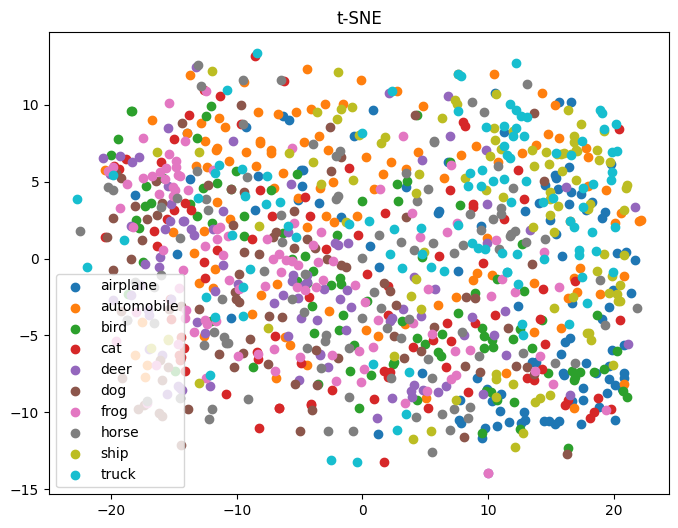

In [10]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train[:1000].reshape(1000, -1))

plt.figure(figsize=(8, 6))
for i in range(10):
    indices = np.where(y_train[:1000] == i)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=labels[i])
plt.title("t-SNE")
plt.legend()
plt.show()

## Observation

Animals are close to each other on the left while trucks, ships and airplanes on the right. The separation between the animals are captured better in this technique.

## UMAP

Dimension reduction technique that captures local relationship within a class and global relationship among classes.

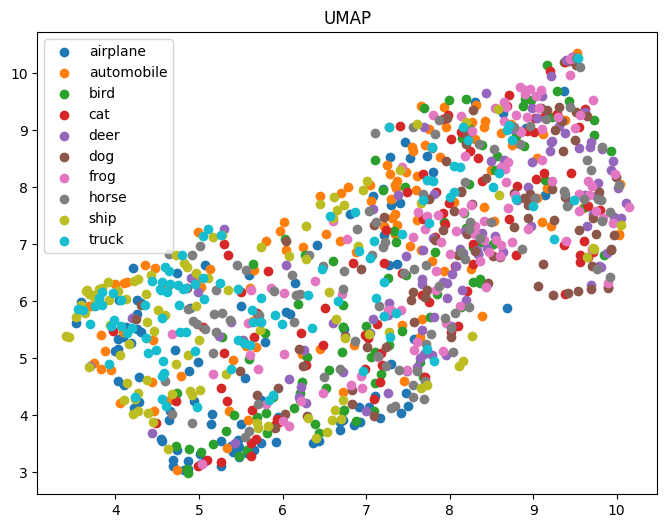

In [14]:
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X_train[:1000].reshape(1000, -1))

plt.figure(figsize=(8, 6))
for i in range(10):
    indices = np.where(y_train[:1000] == i)
    plt.scatter(X_umap[indices, 0], X_umap[indices, 1], label=labels[i])
plt.title("UMAP")
plt.legend()
plt.show()

## Observation

Trucks, ships and airplanes are close to each other on the left as they are big man mande objects while most animals are clustered far on the right.

# Conclusion

All of these techniques except PCA capture the disimilarity between man made objects like trucks, ships and airplanes; and animals. Birds and airplanes are mostly close to each other probably due to the act of flying and wings.